# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Zeyad Yasser

ID: 55-7161

Tutorial: 1

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,$99.65/m,$820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$89.1/m,$1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,$29.75/m,$301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,$104.8/m,$3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),$56.15/m,$3487.95,No


## Data Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')
print(df.info())
print("\nShape of the dataset:", df.shape)

## Data Cleaning

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

# Drop rows where 'customerID' is missing
df = df.dropna(subset=['customerID'])

# Clean 'TotalCharges' by removing non-numeric characters and converting to numeric
df['TotalCharges'] = df['TotalCharges'].replace('[\$,]', '', regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Fill missing values

# Fill missing values in other numerical columns with the median
df = df.fillna(df.median(numeric_only=True))

# Fill missing values for categorical columns with the mode
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Standardize categorical columns by stripping whitespace and converting to lowercase
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.strip().str.lower()

# Convert binary categorical columns to numerical values
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0, 'female': 0, 'male': 1})

# One-hot encode multi-category categorical columns
df = pd.get_dummies(df, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Convert 'MultipleLines' to numeric, mapping 'Yes' to 1, 'No' and 'No phone service' to 0
df['MultipleLines'] = df['MultipleLines'].map({'yes': 1, 'no': 0, 'no phone service': 0})

# Convert 'MonthlyCharges' to numeric by removing any non-numeric characters (if any)

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


# Confirm the data after cleaning
print("Data after cleaning:")
df.info()
df.head()

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             6976 non-null   object 
 1   gender                                 6976 non-null   int64  
 2   SeniorCitizen                          6976 non-null   int64  
 3   Partner                                6976 non-null   int64  
 4   Dependents                             6976 non-null   int64  
 5   tenure                                 6976 non-null   int64  
 6   PhoneService                           6976 non-null   int64  
 7   MultipleLines                          6976 non-null   int64  
 8   PaperlessBilling                       6976 non-null   int64  
 9   MonthlyCharges                         0 non-null      float64
 10  TotalCharges                           6976 non-null   f

<ipython-input-59-99527ffc000a>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,...,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,7590-vhveg,0,0,1,0,1,0,0,1,NaN,...,False,False,False,False,False,False,False,False,True,False
1,5575-gnvde,1,0,0,0,34,1,0,0,NaN,...,False,False,False,False,False,True,False,False,False,True
2,3668-qpybk,1,0,0,0,2,1,0,1,NaN,...,False,False,False,False,False,False,False,False,False,True
3,7795-cfocw,1,0,0,0,45,0,0,0,NaN,...,True,False,False,False,False,True,False,False,False,False
4,9237-hqitu,0,0,0,0,2,1,0,1,NaN,...,False,False,False,False,False,False,False,False,True,False


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

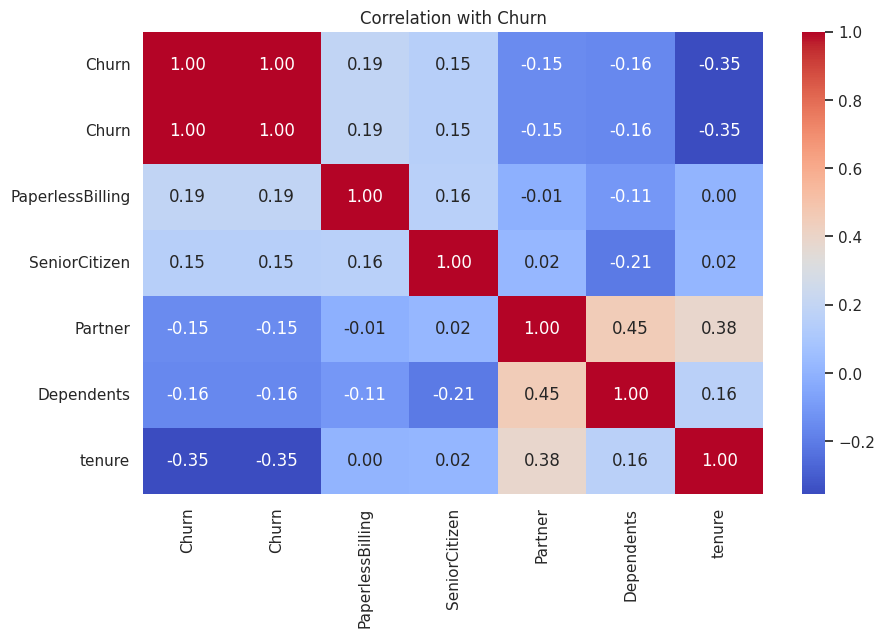

In [4]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
significant_correlations = churn_correlation[abs(churn_correlation) > 0.1]
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Churn'] + significant_correlations.index.tolist()].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Churn')
plt.show()



**Answer for Q1**:

#The most important factors related to customer churn in this dataset are tenure, paperless billing, senior citizen status, and partner status. Tenure has the strongest correlation with churn at -0.35, suggesting that customers who have been with the company for a shorter time are more likely to leave. Paperless billing has a positive correlation of 0.19 with churn, indicating that customers who use paperless billing are slightly more likely to leave. Senior citizen status shows a correlation of 0.15 with churn, meaning that senior customers may be more likely to churn. Lastly, partner status has a correlation of -0.15, suggesting that customers without a partner are more prone to leaving. These numbers reflect the strongest connections between these attributes and customer churn.

[link text](https://)**Q2: Which payment method has the highest churn rate?**

**Visualization**

Churn rate by payment method:
PaymentMethod_credit card (automatic)
False    0.297042
True     0.152531
Name: Churn, dtype: float64


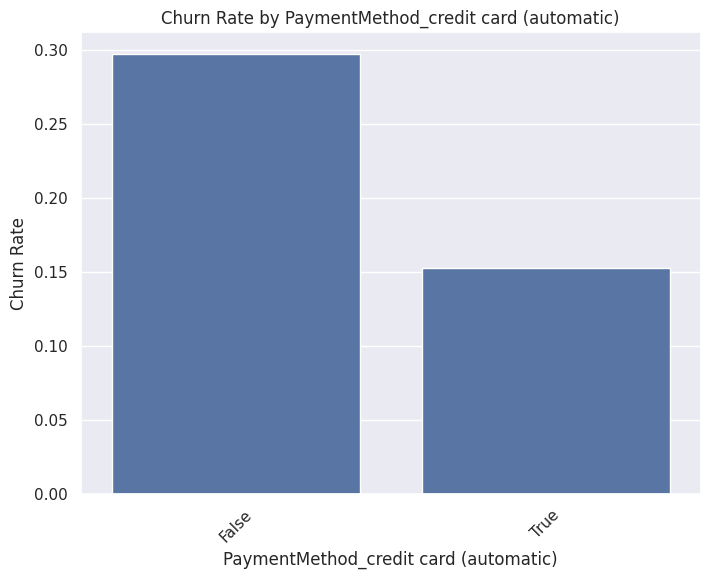

In [5]:
similar_columns = [col for col in df.columns if 'payment' in col.lower()]

if similar_columns:
    payment_column = similar_columns[0]
    churn_by_payment = df.groupby(payment_column)['Churn'].mean().sort_values(ascending=False)
    print("Churn rate by payment method:")
    print(churn_by_payment)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values)
    plt.title(f"Churn Rate by {payment_column}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Available columns: {df.columns.tolist()}")
    print("No column related to payment method found in the DataFrame.")

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

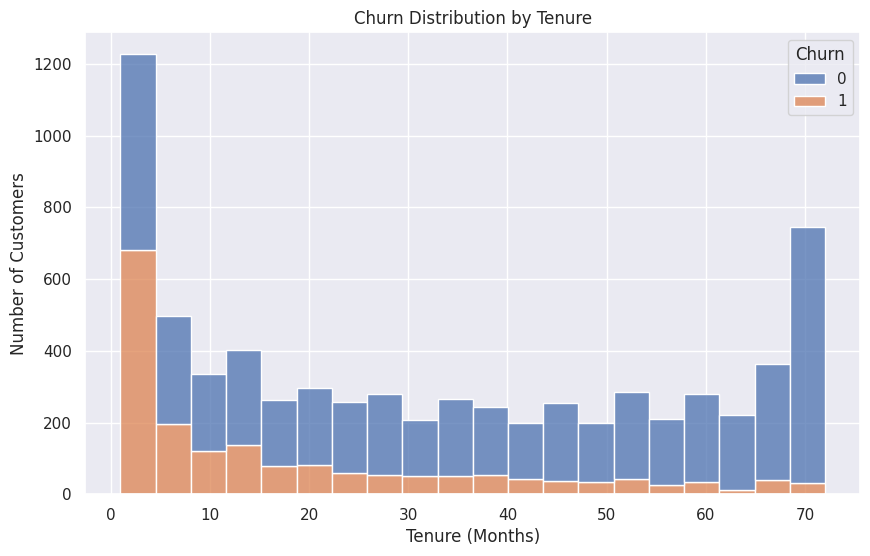

In [6]:
df['tenure'] = pd.to_numeric(df['tenure'])
df['Churn'] = df['Churn'].astype('category')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=20)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

**Answer for Q3**: Your answer here:This chart clearly shows that customers commonly churn within the first 5 months of their tenure. During this period, the churn rate is notably higher, after which it stabilizes to a lower, more consistent level. This suggests that the initial 5 months are critical for customer retention. Focusing efforts on engaging and supporting new customers within this timeframe may help reduce the overall churn rate effectively.

## Data Preparation for Modelling

In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

# Drop irrelevant columns
df = df.drop(columns=['customerID'], errors='ignore')

# Step 1: Clean 'MonthlyCharges' and 'TotalCharges' columns
df['MonthlyCharges'] = df['MonthlyCharges'].replace({'\$': '', '/m': ''}, regex=True)
df['TotalCharges'] = df['TotalCharges'].replace({'\$': ''}, regex=True)

# Convert to numeric, coercing errors to NaN for non-numeric entries
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values in 'MonthlyCharges' and 'TotalCharges' with the median
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Step 2: Map 'Female' to 0 and 'Male' to 1 in the gender column
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Step 2: Convert 'No internet service' to 'No' in internet-dependent columns
internet_dependent_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                              'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in internet_dependent_columns:
    if column in df.columns:
        df[column] = df[column].replace({'No internet service': 'No'})

# Step 3: Convert binary columns using LabelEncoder
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaperlessBilling', 'Churn']

label_encoder = LabelEncoder()

for column in binary_columns:
    if column in df.columns:
        # Use LabelEncoder to convert to binary (1 and 0)
        df[column] = label_encoder.fit_transform(df[column].fillna('No'))

# Step 4: One-hot encode remaining multi-category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Final check for any remaining NaN values after preprocessing
print("Remaining NaN values after preprocessing:")
print(df.isnull().sum())

# Optional: Display the first few rows of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
print(df.head())


Remaining NaN values after preprocessing:
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMetho

<ipython-input-79-27ab243198a5>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
<ipython-input-79-27ab243198a5>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

## Modelling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.7022032693674485

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.45      0.54      0.49       374

    accuracy                           0.70      1407
   macro avg       0.63      0.65      0.64      1407
weighted avg       0.72      0.70      0.71      1407



### Tree Visualization

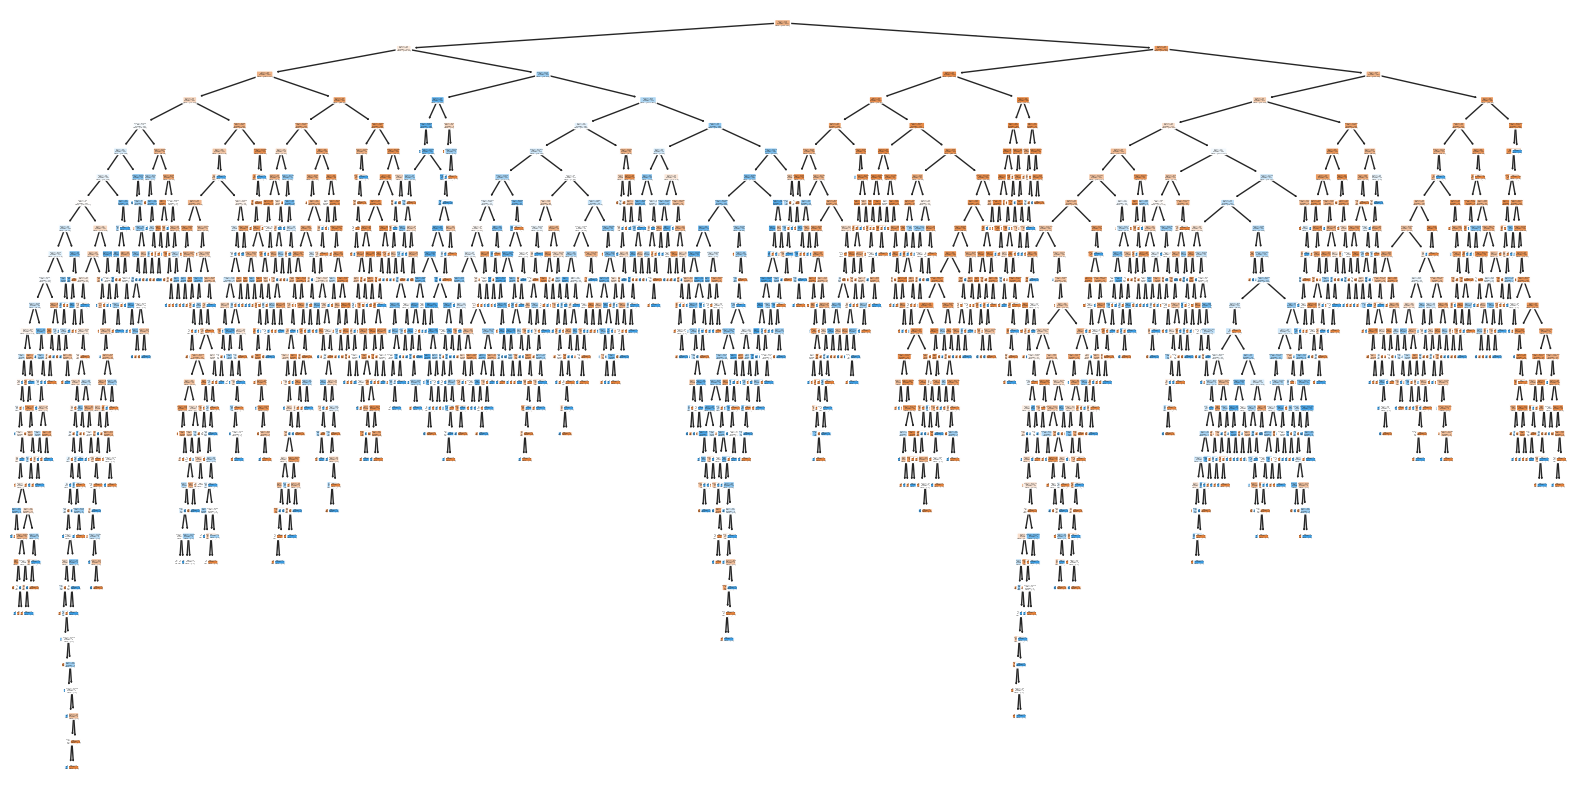

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the tree without feature names or class names for a minimalistic view
plot_tree(clf, filled=True, rounded=True, fontsize=0)  # Set fontsize to 0 to remove text

# Show the plot
plt.show()


## Evaluation

In [ ]:
The decision tree visualization shows that the model is quite large, with many branches and layers. This indicates that the model has captured a lot of details from the training data, which may lead to overfitting. Overfitting means the model may perform well on training data but less effectively on new, unseen data.

The deep structure of the tree suggests that it might be making very specific decisions based on the training data, which could explain the lower recall for predicting churn. By focusing too much on specific patterns in the data, the model might miss general trends that could help it perform better on test data.

To address this, we could try simplifying the tree by limiting its depth or using pruning techniques to remove less important branches. This could make the model more general and potentially improve its accuracy in predicting churn on new data. Additionally, using ensemble methods like Random Forests could help by combining multiple simpler trees for a more balanced prediction.

In summary, the decision tree is very detailed, which could be affecting its performance. Simplifying it might improve its ability to generalize to new data, especially for identifying customers likely to churn.

## Bonus (Optional)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict using logistic regression
y_pred_logreg = log_reg.predict(X_test)

# Evaluate logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print("Logistic Regression Model")
print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)
print("\nClassification Report:\n", report_logreg)

# Compare with the decision tree model
y_pred_tree = clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print("\nDecision Tree Model")
print("Accuracy:", accuracy_tree)
print("F1 Score:", f1_tree)
print("\nClassification Report:\n", report_tree)

# Summary of results
print("\nComparison Summary:")
print(f"Logistic Regression - Accuracy: {accuracy_logreg}, F1 Score: {f1_logreg}")
print(f"Decision Tree - Accuracy: {accuracy_tree}, F1 Score: {f1_tree}")


Logistic Regression Model
Accuracy: 0.7903340440653873
F1 Score: 0.5767575322812052

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407


Decision Tree Model
Accuracy: 0.7022032693674485
F1 Score: 0.48964677222898906

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1033
           1       0.45      0.54      0.49       374

    accuracy                           0.70      1407
   macro avg       0.63      0.65      0.64      1407
weighted avg       0.72      0.70      0.71      1407


Comparison Summary:
Logistic Regression - Accuracy: 0.7903340440653873, F1 Score: 0.5767575322812052
Decision Tree - Accuracy: 0.70

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
